## First attempt -- Galaxy Zoo + SDSS galaxy classification

Volunteers were asked to classify SDSS galaxies as belonging to one of six categories - elliptical, clockwise spiral, anticlockwise spiral, edge-on galaxies, 'star/don't know' or merger

Note: Both GZ1 and GZ2 are based off SDSS DR7, but GZ2 takes clearer/brighter images and uses 250K galaxies instead of 900K

In [1]:
from astropy.io import fits
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Viewing the results of the GZ1 'survey'

In [ ]:
hdul = fits.open('C:\\Users\\mbeye\\Downloads\\GalaxyZoo1_DR_table2.fits')
data = hdul[1].data

native_data = np.array(data, dtype=data.dtype.newbyteorder('='))
df = pd.DataFrame(native_data)

In [50]:
print(df.shape)
print(df.columns)

(667944, 16)
Index(['OBJID', 'RA', 'DEC', 'NVOTE', 'P_EL', 'P_CW', 'P_ACW', 'P_EDGE',
       'P_DK', 'P_MG', 'P_CS', 'P_EL_DEBIASED', 'P_CS_DEBIASED', 'SPIRAL',
       'ELLIPTICAL', 'UNCERTAIN'],
      dtype='object')


In [61]:
df.head(20)

,OBJID,RA,DEC,NVOTE,P_EL,P_CW,P_ACW,P_EDGE,P_DK,P_MG,P_CS,P_EL_DEBIASED,P_CS_DEBIASED,SPIRAL,ELLIPTICAL,UNCERTAIN
0,587727178986356823,b'00:00:00.41',b'-10:22:25.7',59,0.610,0.034,0.000,0.153,0.153,0.051,0.186,0.610,0.186,0,0,1
1,587727227300741210,b'00:00:00.74',b'-09:13:20.2',18,0.611,0.000,0.167,0.222,0.000,0.000,0.389,0.203,0.797,1,0,0
2,587727225153257596,b'00:00:01.03',b'-10:56:48.0',68,0.735,0.029,0.000,0.147,0.074,0.015,0.176,0.432,0.428,0,0,1
3,587730774962536596,b'00:00:01.38',b'+15:30:35.3',52,0.885,0.019,0.000,0.058,0.019,0.019,0.077,0.885,0.077,0,1,0
4,587731186203885750,b'00:00:01.55',b'-00:05:33.3',59,0.712,0.000,0.000,0.220,0.068,0.000,0.220,0.640,0.290,0,0,1
5,587727180060098638,b'00:00:01.57',b'-09:29:40.3',28,0.857,0.000,0.036,0.000,0.107,0.000,0.036,0.830,0.060,0,0,1
6,587731187277627676,b'00:00:01.86',b'+00:43:09.3',38,0.500,0.000,0.053,0.289,0.105,0.053,0.342,0.351,0.473,0,0,1
7,587727223024189605,b'00:00:02.00',b'+15:41:49.8',26,0.423,0.000,0.000,0.577,0.000,0.000,0.577,0.143,0.857,1,0,0
8,587730775499407375,b'00:00:02.10',b'+15:52:54.2',62,0.355,0.016,0.210,0.323,0.000,0.097,0.548,0.355,0.548,0,0,1
9,587727221950382424,b'00:00:02.41',b'+14:49:19.0',31,0.484,0.129,0.065,0.258,0.065,0.000,0.452,0.109,0.789,1,0,0


### Trying to access data directly from SDSS 

In [78]:
from astroquery.sdss import SDSS
from astropy.coordinates import SkyCoord
import astropy.units as u
import matplotlib.pyplot as plt

# Sexagesimal strings (decoded if necessary)
ra_str = '00:00:00.41'   # HH:MM:SS format
dec_str = '-10:22:25.7'  # DD:MM:SS format

# Define SkyCoord with correct units
position = SkyCoord(ra=ra_str, dec=dec_str, unit=(u.hourangle, u.deg), frame='icrs')

# Query SDSS for r-band image (you can change to 'g', 'i', etc.)
images = SDSS.get_images(coordinates=position, band='z', radius=0.02 * u.deg)

# Show image
hdu = images[0][0]

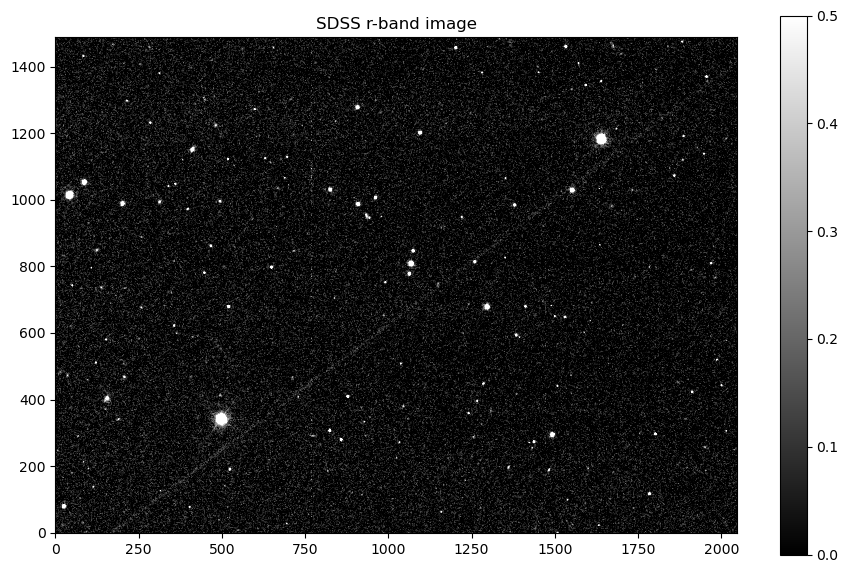

In [81]:
plt.figure(figsize=(11,7))
plt.imshow(hdu.data, cmap='gray', origin='lower', vmin=0, vmax=0.5)
plt.title('SDSS r-band image')
plt.colorbar()
plt.show()

### Giving up with using SDSS, instead took clean data from Kaggle

But this takes the GZ2 dataset so a bit more complicated than doing it with GZ1 as a first test

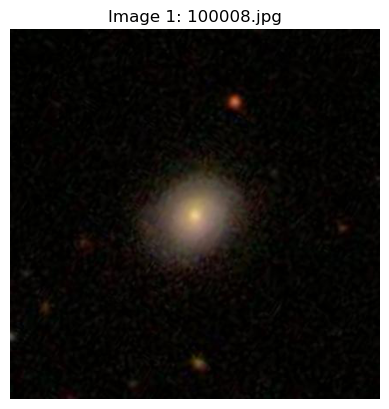

In [108]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg  # for reading .jpg
from IPython.display import display

# Set your folder path
folder_path = 'C:/Users/mbeye/Downloads/galaxy-zoo-the-galaxy-challenge/images_training_rev1/images_training_rev1'

# Get list of .jpg files (sorted)
jpg_files = sorted([f for f in os.listdir(folder_path) if f.lower().endswith('.jpg')])

# Function to display a specific image by index
def show_image(index):
    if 0 <= index < len(jpg_files):
        img_path = os.path.join(folder_path, jpg_files[index])
        img = mpimg.imread(img_path)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Image {index + 1}: {jpg_files[index]}")
        plt.show()
    else:
        print(f"Index {index} out of range. Choose between 0 and {len(jpg_files) - 1}.")

# Example: Show image 1 (index 0)
show_image(0)

In [93]:
training_solutions_path = 'C:/Users/mbeye/Downloads/galaxy-zoo-the-galaxy-challenge/training_solutions_rev1/training_solutions_rev1.csv'
training_solutions = pd.read_csv(training_solutions_path)

In [98]:
training_solutions.head(10)

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.000000,0.000000,0.000000,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.000000,0.000000,0.000000,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.000000,0.000000,0.000000,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,100122,0.738832,0.238159,0.023009,0.000000,0.238159,0.000000,0.238159,0.000000,0.238159,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,100123,0.462492,0.456033,0.081475,0.000000,0.456033,0.000000,0.456033,0.000000,0.456033,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,100128,0.687783,0.288344,0.023873,0.000000,0.288344,0.069098,0.219246,0.000000,0.288344,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,100134,0.021834,0.976952,0.001214,0.021751,0.955201,0.313077,0.642124,0.546491,0.408711,...,0.021751,0.207253,0.152044,0.187194,0.000000,0.000000,0.054649,0.081974,0.081974,0.327894
9,100143,0.269843,0.730157,0.000000,0.730157,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.168728,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Now using DECaLS data instead

#### Setting up data

In [154]:
gz5_path = 'C:/Users/mbeye/Downloads/gz_decals_volunteers_5.csv'
gz5_data = pd.read_csv(gz5_path)
gz5_data.columns = gz5_data.columns.str.replace('-', '_').str.replace(' ', '_')
print(gz5_data.head(3).T.to_string())

                                                                             0                                 1                                 2
iauname                                                    J112953.88-000427.4               J104325.29+190335.0               J104629.54+115415.1
ra                                                                  172.474526                        160.856533                        161.623135
dec                                                                  -0.074281                         19.060441                         11.904197
redshift                                                              0.124142                          0.049088                          0.092906
elpetro_absmag_r                                                    -21.253342                         -21.77541                        -19.947397
sersic_nmgy_r                                                        167.26288                         2941.7292      

Total number of samples with more than 30 votes:  59185


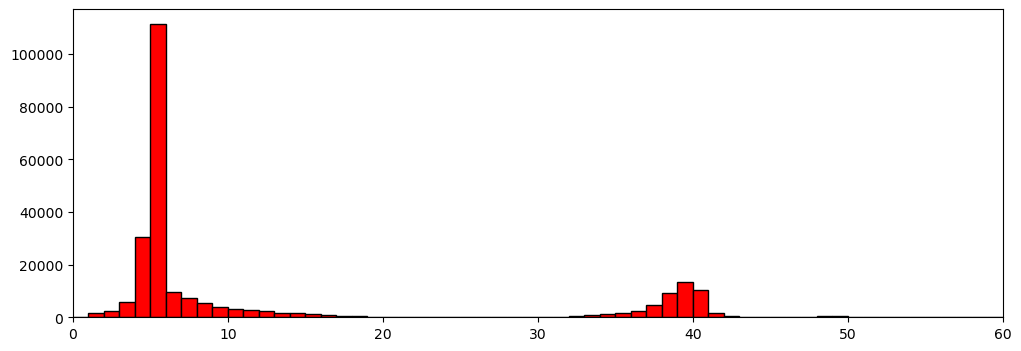

In [156]:
print("Total number of samples with more than 30 votes: ", len(gz5_data[gz5_data['smooth_or_featured_total_votes'] > 30]))
plt.figure(figsize=(12, 4))
plt.hist(gz5_data['smooth_or_featured_total_votes'], bins=60, range=(0, 60), edgecolor='k', color='r')
plt.xlim(0, 60)
plt.show()

In [148]:
import os

data_folder_path = 'C:/Users/mbeye/Downloads/gz_decals_dr5_png_part1'

image_filenames = []
image_filepaths = []

n_files_found = 0

gz5_dict = {}
for row in gz5_data.itertuples(index=False):
    if row.iauname and row.smooth_or_featured_total_votes > 30 and not row.wrong_size_warning:
        gz5_dict[row.iauname] = row

for root, dirs, files in os.walk(data_folder_path):
    for file in files:
        n_files_found += 1
        if file.lower().endswith('.png'):
            base_name = os.path.splitext(file)[0]
            if base_name in gz5_dict:
                image_filenames.append(base_name)
                image_filepaths.append(os.path.join(root, file))

print("Total .png files found:", n_files_found)
print("Total matching images:", len(image_filenames))


Total .png files found: 91482
Total matching images: 18697


In [149]:
gz5_data_reduced = gz5_data[gz5_data['iauname'].isin(image_filenames)].copy().sort_values(by='iauname')

In [180]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame
cols = [
    'smooth_or_featured_smooth_fraction',
    'smooth_or_featured_featured_or_disk_fraction',
    'smooth_or_featured_artifact_fraction'
]

# # Drop rows with all NaNs in those columns
valid_df = gz5_data_reduced[cols]

# Get index of the max value per row
argmax = np.argmax(valid_df.values, axis=1)

# Count how many times each index (0=smooth, 1=feature/disk, 2=artifact) appears
counts = pd.Series(argmax).value_counts(normalize=True).sort_index()

# Display percentages
labels = ['smooth', 'featured_or_disk', 'artifact']
percentages = {labels[i]: round(counts.get(i, 0), 3) for i in range(3)}

print(percentages)


{'smooth': 0.618, 'featured_or_disk': 0.377, 'artifact': 0.005}


In [183]:
list(gz5_data_reduced.columns)

['iauname',
 'ra',
 'dec',
 'redshift',
 'elpetro_absmag_r',
 'sersic_nmgy_r',
 'petro_th50',
 'petro_th90',
 'petro_theta',
 'upload_group',
 'active_learning_on',
 'in_gzd_ab',
 'png_loc',
 'smooth_or_featured_total_votes',
 'smooth_or_featured_smooth',
 'smooth_or_featured_smooth_fraction',
 'smooth_or_featured_smooth_debiased',
 'smooth_or_featured_featured_or_disk',
 'smooth_or_featured_featured_or_disk_fraction',
 'smooth_or_featured_featured_or_disk_debiased',
 'smooth_or_featured_artifact',
 'smooth_or_featured_artifact_fraction',
 'smooth_or_featured_artifact_debiased',
 'disk_edge_on_total_votes',
 'disk_edge_on_yes',
 'disk_edge_on_yes_fraction',
 'disk_edge_on_yes_debiased',
 'disk_edge_on_no',
 'disk_edge_on_no_fraction',
 'disk_edge_on_no_debiased',
 'has_spiral_arms_total_votes',
 'has_spiral_arms_yes',
 'has_spiral_arms_yes_fraction',
 'has_spiral_arms_yes_debiased',
 'has_spiral_arms_no',
 'has_spiral_arms_no_fraction',
 'has_spiral_arms_no_debiased',
 'bar_total_votes

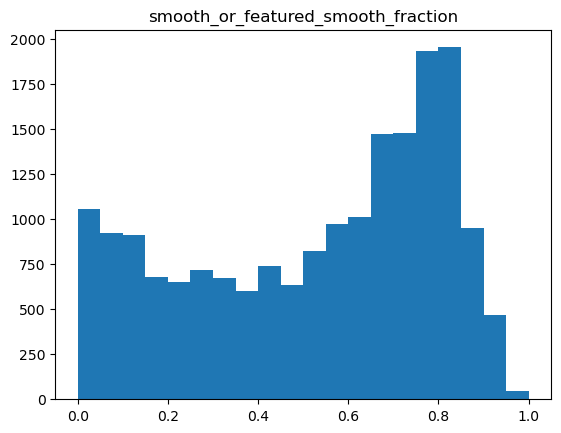

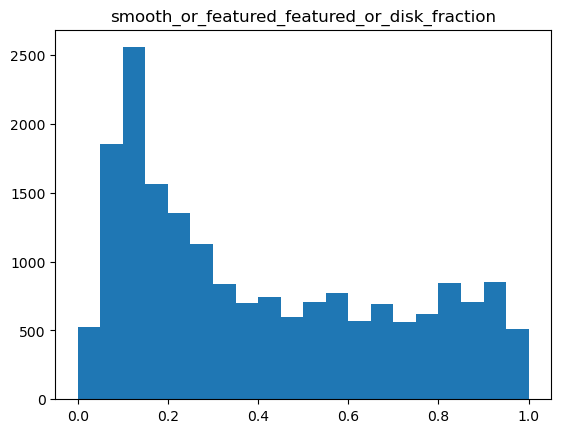

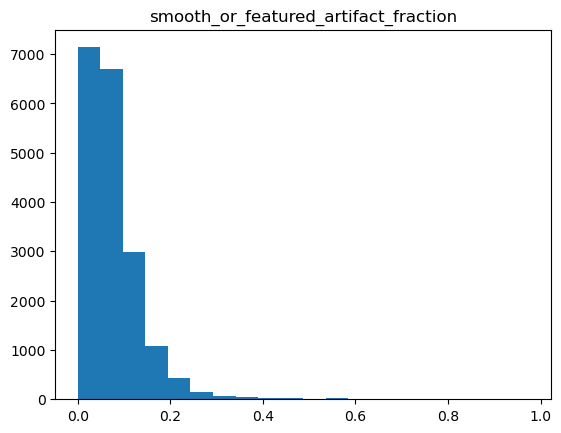

In [171]:
gz5_data_reduced[['smooth_or_featured_smooth_fraction']].hist(grid=False, bins=20)
gz5_data_reduced[['smooth_or_featured_featured_or_disk_fraction']].hist(grid=False, bins=20)
gz5_data_reduced[['smooth_or_featured_artifact_fraction']].hist(grid=False, bins=20)
plt.show()

In [174]:
gz5_data_reduced[[col for col in gz5_data.columns if col.endswith('_votes')]]

,smooth_or_featured_total_votes,disk_edge_on_total_votes,has_spiral_arms_total_votes,bar_total_votes,bulge_size_total_votes,how_rounded_total_votes,edge_on_bulge_total_votes,spiral_winding_total_votes,spiral_arm_count_total_votes,merging_total_votes
200785,59,50,50,50,50,6,0,45,45,56
105815,54,47,47,47,47,6,0,45,45,53
208099,48,39,0,0,0,6,39,0,0,45
210542,39,2,2,2,2,31,0,0,0,33
84273,53,46,13,13,13,5,33,10,10,51
...,...,...,...,...,...,...,...,...,...,...
112147,80,33,23,23,23,43,10,8,8,76
201864,37,3,2,2,2,30,1,0,0,33
38925,38,18,7,7,7,18,11,3,3,36
100774,37,6,6,6,6,24,0,0,0,30


In [187]:
gz5_questions = [col[:-9] for col in gz5_data.columns if col.endswith('_fraction')]

In [188]:
gz5_question_groups = ['smooth_or_featured', 'disk_edge', 'has_spiral_arms', 'bar', 'bulge_size', 'how_rounded', 
                       'edge_on_bulge', 'spiral_winding', 'spiral_arm_count', 'merging']

In [169]:
import torchvision.models as models
import torch.nn as nn

model_resnet = models.resnet18(pretrained=True)

ModuleNotFoundError: No module named 'torchvision'

In [62]:
import os
from PIL import Image
import numpy as np

# Your directory with images
directory = "C:/Users/mbeye/Downloads/gz_decals_dr5_png_part1/test"

# Supported image formats
allowed_extensions = [".jpg", ".jpeg", ".png", ".bmp"]

# Initialize your dataset list
galaxy_data = []

dir_list = os.listdir(directory)

# Loop through the files
for filename in dir_list:
    if any(filename.lower().endswith(ext) for ext in allowed_extensions):
        # Assume filename is something like "GalaxyName123.jpg"
        galaxy_name = os.path.splitext(filename)[0]  # Remove file extension
        
        # Load image and convert to array
        image_path = os.path.join(directory, filename)
        img = Image.open(image_path).convert("RGB")
        img_array = np.array(img) / 255  # Normalize to [0, 1]
        
        # Append to your dataset
        galaxy_data.append([galaxy_name, img_array])

In [12]:
import os
import numpy as np
from PIL import Image
from tqdm import tqdm

# Directory with images
image_dir = "C:/Users/mbeye/Downloads/gz_decals_dr5_png_part1/J000"

# Get list of all image files
image_files = sorted([f for f in os.listdir(image_dir) if f.endswith('.jpg') or f.endswith('.png')])

# Initialize arrays (you’ll fill them)  
X_data = []
y_data = []

# Loop over files
for fname in tqdm(image_files):
    # Extract galaxy name (e.g., 'galaxy1' from 'galaxy1.jpg')
    galaxy_id = os.path.splitext(fname)[0]

    # Try to find the row in the DataFrame
    row = volunteer_1_2_data[volunteer_1_2_data['iauname'] == galaxy_id]
    
    if row.empty:
        continue  # Skip if not found

    # Get vote fractions
    y = [
        row['smooth-or-featured_smooth_fraction'].values[0],
        row['smooth-or-featured_featured-or-disk_fraction'].values[0],
        row['smooth-or-featured_artifact_fraction'].values[0],
    ]

    # Load image
    img_path = os.path.join(image_dir, fname)
    img = Image.open(img_path).convert("RGB")
    # img = img.resize((424, 424))  # Resize if needed
    img_array = np.array(img) / 255.0  # Normalize to [0, 1]

    # Append
    X_data.append(img_array)
    y_data.append(y)

# Convert to numpy arrays
X_train = np.array(X_data, dtype=np.float32)
y_train = np.array(y_data, dtype=np.float32)

print("X_train shape:", X_train.shape)  # (N, 424, 424, 3)
print("y_train shape:", y_train.shape)  # (N, 3)

100%|██████████| 1628/1628 [00:32<00:00, 50.75it/s]


X_train shape: (929, 424, 424, 3)
y_train shape: (929, 3)


In [13]:
X_train = 1

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

input_shape = (424, 424, 3)

# Create the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')  # 3 vote fraction outputs
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',  # vote fractions as target distribution
    metrics=['mae']  # optionally track Mean Absolute Error
)

model.summary()

c:\Users\mbeye\.conda\envs\py39adp\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 422, 422, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 211, 211, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 209, 209, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 104, 104, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 102, 102, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 51, 51, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 332928)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 332928)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    42,614,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,708,547 (162.92 MB)

 Trainable params: 42,708,547 (162.92 MB)

 Non-trainable params: 0 (0.00 B)

In [69]:
model.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.2)

Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 122s 2s/step - loss: 0.9696 - mae: 0.1770 - val_loss: 0.9181 - val_mae: 0.1571
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - loss: 0.9033 - mae: 0.1557 - val_loss: 0.8741 - val_mae: 0.1275
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - loss: 0.8629 - mae: 0.1278 - val_loss: 0.8626 - val_mae: 0.1196
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - loss: 0.8395 - mae: 0.1190 - val_loss: 0.8700 - val_mae: 0.1266
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - loss: 0.8389 - mae: 0.1128 - val_loss: 0.8651 - val_mae: 0.1237
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - loss: 0.8094 - mae: 0.0941 - val_loss: 0.8633 - val_mae: 0.1143
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - loss: 0.7954 - mae: 0.0857 - val_loss: 0.8588 - val_mae: 0.1135
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - loss: 0.7936 - mae: 0.0837 - val_loss: 0.8606 - val_mae: 0.1159
Epoch 9/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - loss: 0.772

In [15]:
# Directory with images
image_dir = "C:/Users/mbeye/Downloads/gz_decals_dr5_png_part1/J000"

train_gen = GalaxyDataGenerator(image_files, y_train, image_dir, batch_size=16)

model.fit(train_gen, epochs=10)

c:\Users\mbeye\.conda\envs\py39adp\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


IndexError: index 1080 is out of bounds for axis 0 with size 929

In [92]:
def load_image_and_label(image_path, label_data):
    # Get list of all image files
    image_files = sorted([f for f in os.listdir(image_path) if f.endswith('.jpg') or f.endswith('.png')])

    # Initialize arrays (you’ll fill them)  
    X_data = []
    y_data = []

    n_total = 0
    n_found = 0

    # Loop over files
    for fname in tqdm(image_files):
        n_total += 1

        # Extract galaxy name (e.g., 'galaxy1' from 'galaxy1.jpg')
        galaxy_id = os.path.splitext(fname)[0]

        # Try to find the row in the DataFrame
        row = label_data[label_data['iauname'] == galaxy_id]
        
        if row.empty:
            continue  # Skip if not found
        else:
            n_found += 1
            # Get vote fractions
            y = [
                row['smooth-or-featured_smooth_fraction'].values[0],
                row['smooth-or-featured_featured-or-disk_fraction'].values[0],
                row['smooth-or-featured_artifact_fraction'].values[0],
            ]

            # Load image
            img_path = os.path.join(image_path, fname)
            img = Image.open(img_path).convert("RGB")
            # img = img.resize((424, 424))  # Resize if needed
            img_array = np.array(img) / 255.0  # Normalize to [0, 1]

            # Append
            X_data.append(img_array)
            y_data.append(y)

    # Convert to numpy arrays
    X_train = np.array(X_data, dtype=np.float32)
    y_train = np.array(y_data, dtype=np.float32)

    print(f"Total images in directory: {n_total}, Found without labels : {n_total - n_found}")

    return X_train, y_train

In [115]:
X_val, y_val = load_image_and_label("C:/Users/mbeye/Downloads/gz_decals_dr5_png_part1/J001", volunteer_1_2_data)

 28%|██▊       | 441/1582 [00:13<00:34, 33.27it/s]


MemoryError: Unable to allocate 4.11 MiB for an array with shape (424, 424, 3) and data type float64

In [107]:
volunteer_1_2_data[volunteer_1_2_data['iauname']== 'J001106.29+024040.9']

,iauname,ra,dec,redshift,elpetro_absmag_r,sersic_nmgy_r,petro_th50,petro_th90,petro_theta,upload_group,...,merging_tidal-debris_fraction,merging_tidal-debris_debiased,merging_both,merging_both_fraction,merging_both_debiased,merging_neither,merging_neither_fraction,merging_neither_debiased,wrong_size_statistic,wrong_size_warning
30535,J001106.29+024040.9,2.776488,2.67799,0.042536,-21.517475,3260.1538,9.704307,22.378204,19.84417,pre_active,...,0.152174,0.152174,5,0.108696,0.108696,31,0.673913,0.673913,90.331265,False


In [113]:
model.predict(X_val)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


array([[0.47275808, 0.4390722 , 0.08816974]], dtype=float32)

In [96]:
def show_fraction(iau_name):
    entry = volunteer_1_2_data[volunteer_1_2_data['iauname']== iau_name]
    print(entry[['smooth-or-featured_smooth_fraction',
                 'smooth-or-featured_featured-or-disk_fraction',
                 'smooth-or-featured_artifact_fraction']].T.to_string())

In [114]:
show_fraction('J001316.59+000059.8')

                                                  4612
smooth-or-featured_smooth_fraction            0.471698
smooth-or-featured_featured-or-disk_fraction  0.528302
smooth-or-featured_artifact_fraction          0.000000
